# Régression linéaire multiple : présentation et rappels


- Généralisation naturelle de la régression linéaire simple
- Consiste à expliquer une variable Y en fonction de p variables X par une relation linéaire

In [2]:
from IPython.display import Image
import os

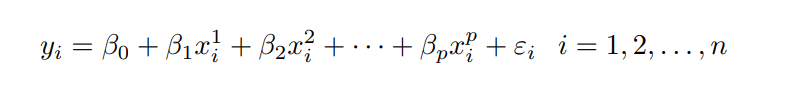

In [3]:
os.chdir("C:/Users/jules/Desktop/Cours/DataScience/projet-transverse/expose-img")
Image(filename='ecriture-modele.png')

# Estimation par les moindres carrés
- Les coefficients du modèle se déterminent par la minimisation de la quantité :

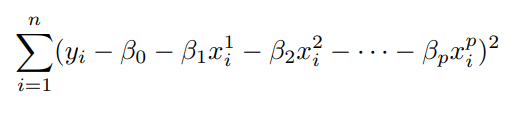

In [4]:
Image(filename='mc-formule.png')

En principe, cela consiste à trouver la droite de régression qui occasionnera le moins d'erreur entre les valeurs prédites et les vraies valeurs de Y

# Illustration par un exemple

In [5]:
import pandas as pd

data = {'year': [2017,2017,2017,2017,2017,2017,2017,2017,2017,2017,2017,2017,2016,2016,2016,2016,2016,2016,2016,2016,2016,2016,2016,2016],
        'month': [12,11,10,9,8,7,6,5,4,3,2,1,12,11,10,9,8,7,6,5,4,3,2,1],
        'interest_rate': [2.75,2.5,2.5,2.5,2.5,2.5,2.5,2.25,2.25,2.25,2,2,2,1.75,1.75,1.75,1.75,1.75,1.75,1.75,1.75,1.75,1.75,1.75],
        'unemployment_rate': [5.3,5.3,5.3,5.3,5.4,5.6,5.5,5.5,5.5,5.6,5.7,5.9,6,5.9,5.8,6.1,6.2,6.1,6.1,6.1,5.9,6.2,6.2,6.1],
        'index_price': [1464,1394,1357,1293,1256,1254,1234,1195,1159,1167,1130,1075,1047,965,943,958,971,949,884,866,876,822,704,719]        
        }

df = pd.DataFrame(data) 

print(df)

    year  month  interest_rate  unemployment_rate  index_price
0   2017     12           2.75                5.3         1464
1   2017     11           2.50                5.3         1394
2   2017     10           2.50                5.3         1357
3   2017      9           2.50                5.3         1293
4   2017      8           2.50                5.4         1256
5   2017      7           2.50                5.6         1254
6   2017      6           2.50                5.5         1234
7   2017      5           2.25                5.5         1195
8   2017      4           2.25                5.5         1159
9   2017      3           2.25                5.6         1167
10  2017      2           2.00                5.7         1130
11  2017      1           2.00                5.9         1075
12  2016     12           2.00                6.0         1047
13  2016     11           1.75                5.9          965
14  2016     10           1.75                5.8      

# Premièrement, on s'assure qu'il existe un lien linéaire entre Y et Xi

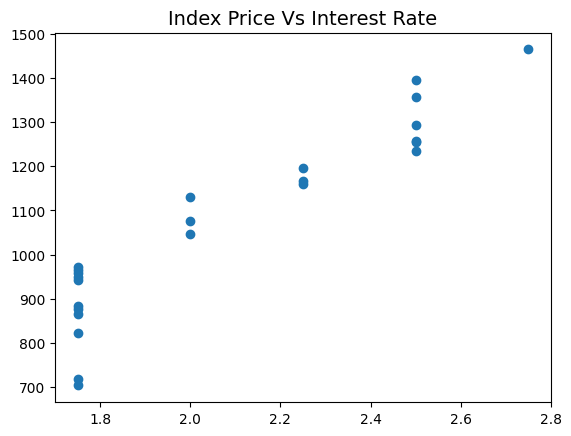

In [9]:
import matplotlib.pyplot as plt


plt.scatter(df['interest_rate'], df['index_price'])
plt.title('Index Price Vs Interest Rate', fontsize=14)
plt.show()

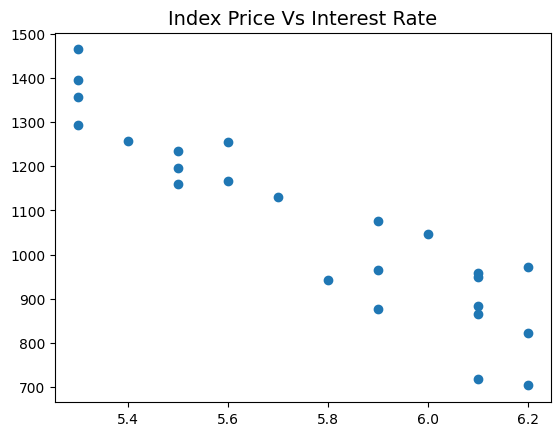

In [10]:
plt.scatter(df['unemployment_rate'], df['index_price'])
plt.title('Index Price Vs Interest Rate', fontsize=14)
plt.show()

## Réalisation du modèle avec statsmodels

In [11]:
import statsmodels.api as sm

In [12]:
x = df[['interest_rate','unemployment_rate']]
y = df['index_price']
 
model = sm.OLS(y, x).fit()
predictions = model.predict(x) 
 
print_model = model.summary()
print(print_model)

                                 OLS Regression Results                                
Dep. Variable:            index_price   R-squared (uncentered):                   0.996
Model:                            OLS   Adj. R-squared (uncentered):              0.995
Method:                 Least Squares   F-statistic:                              2508.
Date:                Mon, 20 Mar 2023   Prob (F-statistic):                    1.10e-26
Time:                        09:09:07   Log-Likelihood:                         -136.70
No. Observations:                  24   AIC:                                      277.4
Df Residuals:                      22   BIC:                                      279.8
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
                        coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------

Text(0.5, 1.0, 'In blue: the predicted values; In orange: the actual values')

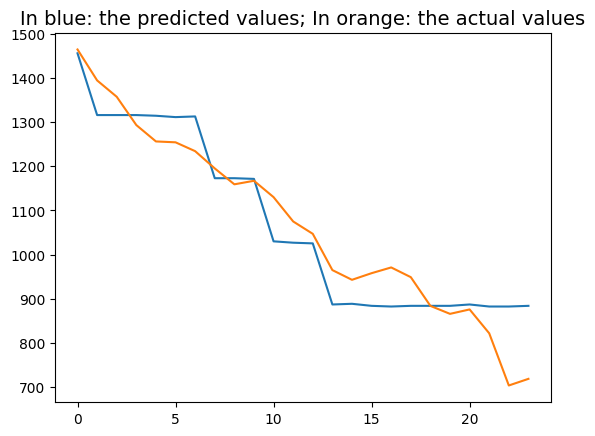

In [16]:
plt.plot(predictions)
plt.plot(df['index_price'])
plt.title('In blue: the predicted values; In orange: the actual values', fontsize=14)

## Il faut systématiquement penser à vérifier les hypothèses de la régression linéaire multiple

1. Les εi sont indépendants et identiquement distribués :  
E(εi) = 0, Var(εi) = σ2 (homoscédasticité des erreurs) 

2. L’erreur ε est indépendante de la distribution conjointe de X1, . . . , Xp :  
Cov(Xi, εj) = 0

3. Absence d'autocorrélation entre les erreurs : Cov(εi, εj) = 0
.
4. En option, pour l’étude spécifique des lois des estimateurs, une quatrième
hypothèse considère la normalité de la variable d’erreur  
εi -> N (0, σ2)